## Analyzing the Stroop Effect

Perform the analysis in the space below. Remember to follow the instructions and review the project rubric before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

**(1) What is the independent variable? What is the dependent variable?**


**Independent variable** is Word Condition (Congruent or Incongruent)

**Dependent variable** is Response Time in seconds

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**


μI - population mean of response time for incongruent words, μC - population mean of response time for congruent words

#### Null Hypothesis
$$H_0: μI- μC = 0$$



There is no difference in the population average response time under congruent words condition and incongruent words condition. 

#### Alternative Hypothesis
$$H_A: μI - μC \neq 0$$

There is a significant difference in the population average response times.


To test the hypothesis,I use ** Two-Tailed Paired T-test**.I use a two tailed test as I would like to determine if there is significant difference in mean response time and not whether one is greater than other. I use paired T-test because we are comparing the means of two groups that are dependent and each participant is involved under both conditions.Also our sample size is less than 30 and we don't know the population standard deviations


#### Assumptions
This test assumes -

The differences are of measurement variables.

Sampling is random and pairs of observations are independent

The distribution of the sample mean difference is normal.(Since the sample size N<30, the sample mean difference will follow a normal distribution if we assume the population under study is normally distributed.)


**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import t
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stroopdata.csv')

In [4]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [6]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Mean response time for congrent words:14.05

Mean response time for incongrent words:22.016

Standard deviation for congruent words: 3.559

Standard deviation for Incongruent words: 4.797

In [9]:
# Add column Participant#
df['Participant #']=df.index+1

In [10]:
df.head()

,Congruent,Incongruent,Participant #
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5


**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

### Visualization of the distribution using Histogram 

C:\Users\Aks\Anaconda3\envs\DAND_P2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


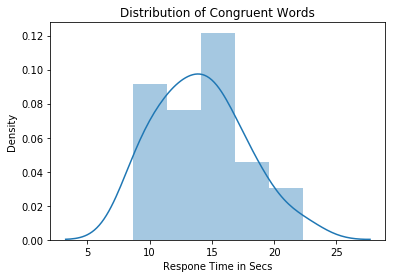

In [12]:
sns.distplot(df['Congruent']);
plt.ylabel('Density')
plt.xlabel('Respone Time in Secs')
plt.title('Distribution of Congruent Words');

The data is more or less normally distributed and the mean of the data is around 15 seconds.

C:\Users\Aks\Anaconda3\envs\DAND_P2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


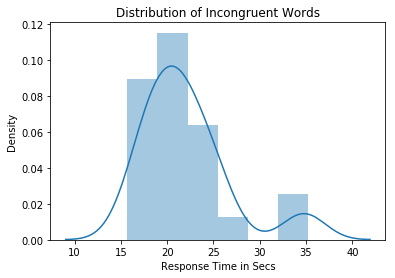

In [13]:
sns.distplot(df['Incongruent']);
plt.ylabel('Density')
plt.xlabel('Response Time in Secs')
plt.title('Distribution of Incongruent Words');

We can see that there are some data points on the upper end of this distribution that skew it right.Overall we can say that mean of  distribution for Incongruent words is greater when compared to Congruent words.

### Visualization of the distribution using Scatter plot


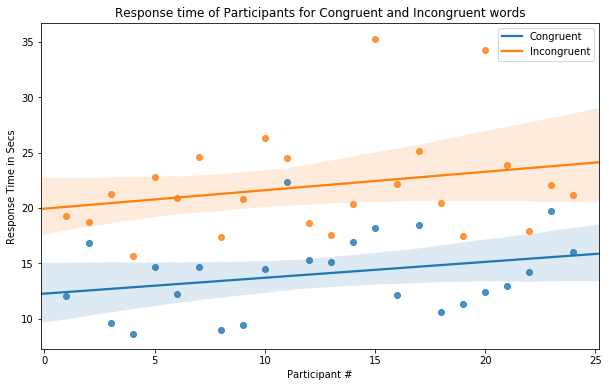

In [14]:
fig = plt.figure(figsize=(10,6))
sns.regplot(data=df, x=df['Participant #'], y=df['Congruent'],label='Congruent')
sns.regplot(data=df, x=df['Participant #'], y=df['Incongruent'],label='InCongruent')
plt.legend(labels=['Congruent','Incongruent'])
plt.ylabel('Response Time in Secs')
plt.title('Response time of Participants for Congruent and Incongruent words');


We can see that Congruent words has on average lower response time between 5 and 15 seconds ,while incongruent words has higher response time between 15 and 26 seconds.We can see consistant difference in response time between congruent and incongruent words for each participant.

**(5) Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.**

### Statistical test

In [73]:
#Add column for differences in processing time for Incongruent and Congruent words
df['Difference'] = df['Incongruent'] - df['Congruent']

In [74]:
#Calculate mean and Standard Deviation of the differences
d=df['Difference'].mean()
s=df['Difference'].std()
n=24

In [75]:
print("The mean of the difference: {0:.4f}".format(d))
print("The standard deviation of the difference: {0:.4f}".format(s))

The mean of the difference: 7.9648
The standard deviation of the difference: 4.8648


#### Calculating T-statistic for paired T-test

In [76]:
#t-statistic for paired T-test
#t = d/(s/√n)

t=d/(s / math.sqrt(24))
print("T-Statistic: {0:.4f}".format(t))

T-Statistic: 8.0207


#### T-statistic and p-value using scipy.stats

In [37]:
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

#### T-critical value 

In [33]:
#t-critical value for a 95% confidence level and 23 d.f for a two-tail test
t.ppf(1-0.025, 23)

2.0686576104190406

For a confidence level of 95% and 23 degrees of freedom, our t-critical value ends up being 2.0687

### Conclusion:
We can see that absolute value of the t-test statistics is greater than the critical value.Also the p-value is much smaller than type 1 error rate of 5%.Hence we reject the null hypothesis.

From the t-test result we can conclude that there is significant difference between response time for congruent words and incongruent words. The results match up with my expectations.

**(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

There are two theories that may explain the Stroop effect:


Speed of Processing Theory: the interference occurs because words are read faster than colors are named.

Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.


Similar task that would result in a similar effect:

Lift your right foot a few inches from the floor and then begin to move it in a clockwise direction. While you’re doing this, use right index finger to draw a number 6 in the air. Your foot will turn in an anticlockwise direction.
The left side of your brain, which controls the right side of your body, is responsible for rhythm and timing. The left side of your brain cannot deal with operating two opposite movements at the same time and so it combines them into a single motion.

Stroop Effect in Marketing

One method of marketing that uses the Stroop Effect might be the attachment of a direct and powerful word like "revolutionary" to what, in reality, is a fairly minor change in a product. The point is to exaggerate the change for example, a new shape of a car's gear shifter and focus the viewer's attention on the word "revolutionary".This is because people tend to focus on the text context instead of the reality.

### References

https://en.wikipedia.org/wiki/Stroop_effect#Processing_speed

https://seaborn.pydata.org/generated/seaborn.distplot.html

https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic

https://github.com/statsmodels/statsmodels/issues/2725

http://www.sthda.com/english/wiki/t-test-formula